In [121]:
from scipy.special import logsumexp
from sklearn.cluster import KMeans
from scipy.special import logsumexp
import sys

class EM:
    p = None
    dim = None # dimension of the data space
    n_points = None # Number of data points
    n_clusters = None # Number of clusters
    pi = None # The prior probability vector of pi_j values
    nnz = None
    p_spread = .99 # the probability weight
    X = None # the data
    q_all = [sys.maxsize]
    
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        return
    
    # private method
    # initialize p and pi using KMeans
    def initialize(self):
        
        self.p = 1.0/self.dim * np.ones((self.n_clusters, self.dim))
        self.pi = 1.0/self.n_clusters * np.ones(self.n_clusters)
        
        km = KMeans(n_clusters=self.n_clusters)
        km.fit(self.X)
        clusters = km.labels_
        
        for j in range(self.n_clusters):
            cluster_points = self.X[clusters == j, :]
            self.pi[j] = cluster_points.shape[0] / self.n_points
            
            dist = np.sum(cluster_points, 0)
            p_j = dist * self.p_spread / np.sum(dist)
            zero_count = (p_j == 0).sum()
            p_j[p_j == 0] = (1 - self.p_spread)/zero_count
            
            self.p[j] = p_j
            
        self.p = self.p.transpose()
        self.pi = np.ones(shape = self.n_clusters)/self.n_clusters
                            
        return
    
    def fit(self, X):
        self.n_points = X.shape[0]
        self.dim = X.shape[1]
        self.X = X
        self.initialize();
        display(self.pi)
        i = 1
        while i < 100:
            w = self.e_step()
            self.m_step(w)
            #if (abs(self.q_all[-1] - self.q_all[-2]) < 0.0001):
            #    break
            i = i + 1
            
        return
    
    def e_step(self):
        W = np.dot(self.X, np.log(self.p)) + np.log(self.pi)
        maxs = W.max(axis=1)
        W = (W.T - maxs).T
        W = (W.T - np.log(np.sum(np.exp(W), axis = 1))).T
        W = np.exp(W)
        return W
    
    def m_step(self, W):
        self.pi = np.sum(W, axis = 0)/self.n_points
        self.p = np.dot(self.X.T, W) + 1.0/self.dim
        
        colsum = np.sum(self.p, axis = 0)
        self.p = self.p/colsum
        return
        

In [119]:
# Load the data
nips_data = np.loadtxt('docword.nips.txt', skiprows=3, dtype=int)
X = np.zeros(shape=(1500, 12419))

# Prepare X
for row in nips_data:
    X[row[0]-1][row[1] -1] = row[2]

em = EM(n_clusters=30)
em.fit(X)
display(em.pi)

array([ 0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333,
        0.03333333,  0.03333333,  0.03333333,  0.03333333,  0.03333333])

array([ 0.08238012,  0.01545686,  0.01078279,  0.01603655,  0.08040543,
        0.00401053,  0.02145098,  0.0561089 ,  0.02676344,  0.06348107,
        0.04142736,  0.00406676,  0.00066667,  0.01771888,  0.00133556,
        0.01744409,  0.05411418,  0.0443871 ,  0.08378812,  0.03471061,
        0.0020006 ,  0.03615978,  0.00200105,  0.13097755,  0.00333437,
        0.00671165,  0.01536547,  0.00266796,  0.07742448,  0.04682109])

In [120]:
em.pi.sum()

1.0

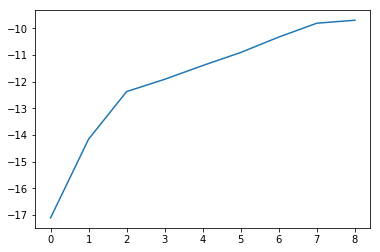

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(em.q_all[1:])

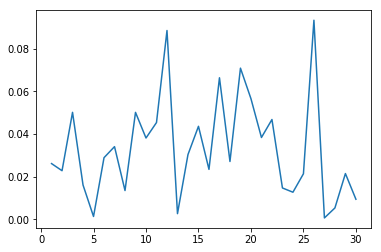

In [115]:
plt.plot([i for i in range(1,31)], em.pi)

In [102]:
em.pi.sum()

0.00066666666666666643